# The impacts of Funding and Funding Rounds on Startup Survival.
### Domain: Startup Ecosysytem

**Context :** Company X is a leading Indian online publisher dedicated to startup industry insights, is driven by a mission to empower its audience with actionable knowlegde.
In the dynamic world of startups, the company recognizes the crucial need to answer a pivotal question. what financial factors differentiate thriving, currently operating startups from those of that cease operation.

## Objective:


This project seeks to address the critical question of wheather there are any significant difference between the mean funds raised by startups that are currently operating to that of those who have ceased operation. Additionally, we aim to investigate if there exist any disparity in the number of funding rounds between the currently operating startups and that has ceased operations.

#### Note: 

*- Dataset Credits--:*  *https://www.kaggle.com/datasets/yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase* (Have applied filter on country and status column)


#### Plan Of Action: 

* *Formulating the hypothesis*: Craft a clear and testable hypothesis that lays the foundation for the analysis.

* *Data Exploration and validation*: Deep dive into the data set to conduct a thorough examination on the quality and coherance of the data, while also have a deeper understanding of the data.

* *Identifying the most appropriate statistical test*: Identity the statistical test that alligns most with the hypothesis and objectives.

* *Statistical Analysis*: Apply the selected test on the dataset, and generate meaningful insights and draw statistically sound conclusions.

* *conclude insights*: Summarize the findings and conclusions and drawn from the analysis, providing actionable insights  that addresses the research objectives.


#### Data Dictionary:

* Name: Company Name
* homepage_url: Startup Web Site
* category_list: Field of company
* funding_total_usd: Total funding recievde in USD
* status: Operating status
* country_code: Country Code
* state_code : State Code of company location
* region : Region of company location
* city : City of company location
* funding_rounds: No of funding rounds
* founded_at: Year in which the company was founded
* first_funding_at: Date of first funding recieved
* last_funding_at: Date of the last funding recieved.

In [1]:
# Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Loading the dataset
df=pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\Education\Project\Impact-of-funding-and-funding-rounds-on-Startups-growth-main\Impact of Funding and Funding Rounds on Startup Survival.xlsx")

C:\Users\HP\AppData\Local\Temp\ipykernel_16804\2148832168.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df=pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\Education\Project\Impact-of-funding-and-funding-rounds-on-Startups-growth-main\Impact of Funding and Funding Rounds on Startup Survival.xlsx")


In [3]:
#viewing the data
df.head()


,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16.0,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05
1,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,6369507.0,operating,IND,10.0,New Delhi,Gurgaon,1,2012-06-01,2012-11-15,2012-11-15
2,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,4000000.0,operating,IND,19.0,Bangalore,Bangalore,1,2001-01-01,2007-11-06,2007-11-06
3,/organization/33coupons,33Coupons,http://33coupons.in,Internet,20000.0,operating,IND,36.0,Kanpur,Kanpur,1,2015-05-01,2015-07-06,2015-07-06
4,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,2065000.0,operating,IND,19.0,Bangalore,Bangalore,2,2006-06-01,2007-12-01,2010-08-01


In [4]:
df.shape

(1134, 14)

In our dataset there is information about 1134 Indian Startups, capturing essentials details about them across 13 columns. while all the features provide valuable insights, our primary focus will be on *"funding_total_usd", "status"* and *"funding rounds"*

#### Step 1: Building The Hypothesis

##### Mean Funds Raised

Null Hypothesis(H0) : There is no statistically significant difference between the mean funds recieved by the startups that are operational and whose status is closed.

Alternate Hypothesis(H1): There is a statistically significant difference between he mean funds recieved by the startups that are operational and whose status is closed.

##### Number Of Funding Rounds

Null Hypotheis(H0): There is no statistically significant difference in the number of funding rounds between currently operating startups and startups that have closed.

Alternative Hypothesis (H1): There is a statistically significant difference in the number of funding rounds between currently operating startups and startups that have closed.

#### Step 2: Data Exploration And Validation


In [5]:
# Removing duplicates if any

df.drop_duplicates().shape

(1134, 14)

There are no duplicates

In [6]:
# Checking if there are any null values

# Columns to check

columns_to_check=['funding_total_usd','status','funding_rounds']

df[columns_to_check].isnull().sum()

funding_total_usd    0
status               0
funding_rounds       0
dtype: int64

There are no null values in the columns of our interest

In [7]:
# visulaising the status column
status_counts=df['status'].value_counts()


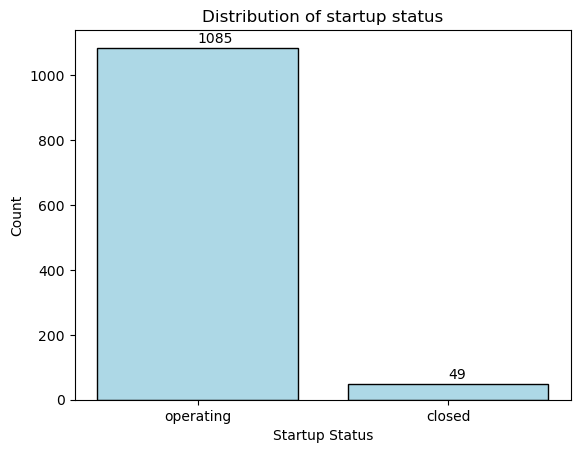

In [8]:
plt.bar(status_counts.index,status_counts.values,color='lightblue',edgecolor='black')
plt.xlabel("Startup Status")
plt.ylabel("Count")
plt.title("Distribution of startup status")


#adding the value counts to the bar

for i, v in enumerate(status_counts):
    plt.text(i,v+15,v)

# i: This is the x-coordinate where the data label will be placed.
# v + 10: This is the y-coordinate where the data label will be placed    

In [9]:
# Lets dive into the Funding column
# Set the display format for float numbers to display complete numbers

pd.options.display.float_format = '{:.0f}'.format

# By setting pd.options.display.float_format to ' {:.0f}'.format, you instruct pandas to format floating-point numbers with 
# zero decimal places, effectively displaying complete numbers.

summary=df['funding_total_usd'].describe()
print(summary)

count         1134
mean      23391193
std      153640842
min            569
25%         200000
50%        1275000
75%       10000000
max     3151140000
Name: funding_total_usd, dtype: float64


The overall average funding recieved is 24 million dollars. Its intertesting to note that the minimum funding recieved is 569 dollars
and the maximum funding recieved is 3 Billion US dollars.

In [10]:
# Identifying the startup with minimum funding

df[df["funding_total_usd"]==569]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
834,/organization/ruralserver,RuralServer,http://www.ruralserver.com,Cloud Computing|Cloud Data Services|Domains|In...,569,operating,IND,36,New Delhi,Noida,1,2010-01-01,2013-10-17,2013-10-17


RuralServer, despite it being the least funded startup, it still operates successfully.

In [11]:
# Maximum Funding
df[df['funding_total_usd']==3151140000]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
321,/organization/flipkart,Flipkart,http://www.flipkart.com,E-Commerce|Online Shopping,3151140000,operating,IND,19,Bangalore,Bangalore,12,2007-09-01,2009-01-01,2015-07-28


The highest funding recieved is for Flipkart, now an ecommerce giant in India.

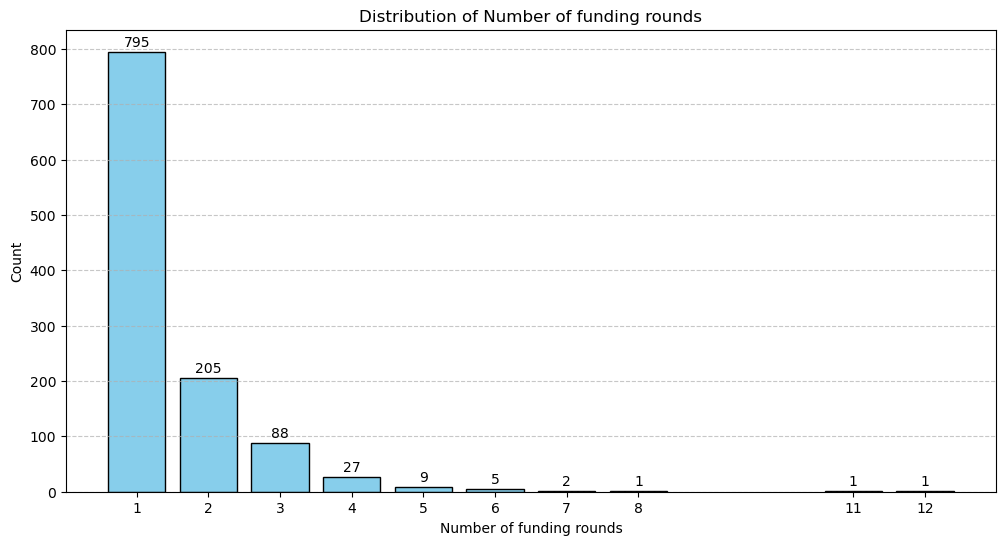

In [12]:
funding_round_count= df['funding_rounds'].value_counts().sort_index()

#plotting the values in bar graph
plt.figure(figsize=(12,6))
bars=plt.bar(funding_round_count.index,funding_round_count.values,color='skyblue',edgecolor='black')
plt.xlabel("Number of funding rounds")
plt.ylabel("Count")
plt.title("Distribution of Number of funding rounds")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set the x-axis ticks explicitly to ensure all values are visible
plt.xticks(funding_round_count.index)

#addiing data labels(count values) to the bars

for bar, count in zip(bars, funding_round_count):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, count, ha='center')
# bar.get_x() + bar.get_width() / 2: This part determines the x-coordinate where the data label will be placed. 
# It calculates the center of the current bar by adding half of the bar's width to its starting x-coordinate.
# bar.get_height() + 10: This part determines the y-coordinate where the data label will be placed. 
# It positions the label slightly above the top of the bar by adding 10 units to the bar's height.





Its quite intersting to see that the large proportion of startups have only undergone only one round of funding(795 to be exact) and there are only two startups who has secured more than 8 funding rounds.

so we can categorise the funding rounds into three categories, 1,2,3+ while doing the hypothesis testing


In [13]:
#startup with 11 rounds of funding

df[df['funding_rounds']==11]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
889,/organization/snapdeal,Snapdeal,http://www.snapdeal.com,E-Commerce,1897699998,operating,IND,7,New Delhi,New Delhi,11,2010-01-01,2011-01-01,2015-08-18


In [14]:
#startup with 12 rounds of funding

df[df['funding_rounds']==12]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
321,/organization/flipkart,Flipkart,http://www.flipkart.com,E-Commerce|Online Shopping,3151140000,operating,IND,19,Bangalore,Bangalore,12,2007-09-01,2009-01-01,2015-07-28


These represent some of the foremost e-commerce platforms, notably Snapdeal and Flipkart.

Now that we've gained a comprehensive understanding of the dataset, let's proceed to test our hypothesis.

#### STEP 3: Selecting the Appropriate Statistical Test

### Mean Funds Raised

Null Hypothesis (H0): There is no statistically significant difference in the mean funds raised by currently operating startups and startups that have closed.

Alternative Hypothesis (H1): There is a statistically significant difference in the mean funds raised by currently operating startups and startups that have closed.



he Levene's Test is a statistical test used to assess whether the variances of two or more groups are equal or homogenous. It is particularly valuable when comparing multiple groups with the same independent variable to ensure that the assumption of homogeneity of variances, a key assumption in many statistical tests, is met.

Null Hypothesis (H0): The null hypothesis in Levene's Test is that there are no significant differences in the variances of the groups being compared. In other words, it assumes that the variances are equal across all groups.

Alternative Hypothesis (H1): The alternative hypothesis in Levene's Test is that there are significant differences in the variances of the groups being compared. If the p-value is sufficiently small, you would reject the null hypothesis in favor of the alternative, indicating that at least one group has a significantly different variance compared to the others.

In practical terms, Levene's Test helps you determine whether it's appropriate to use statistical tests that assume equal variances across groups, such as the independent sample t-test or analysis of variance (ANOVA). If the test indicates unequal variances, you may need to consider alternative statistical methods that are more robust to heteroscedasticity (unequal variances).

Overall, Levene's Test is a valuable tool in the field of statistics for assessing the homogeneity of variances and ensuring the validity of subsequent statistical analyses.

In [15]:
from scipy import stats

group1 = df[df['status'] == 'operating']['funding_total_usd']
group2 = df[df['status'] == 'closed']['funding_total_usd']

stat, p_value = stats.levene(group1, group2)
print("Levene's Test Statistic:", stat)
print("P-value:",p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: Variances are not equal.")
else:
    print("Fail to reject the null hypothesis: Variances are equal.")

Levene's Test Statistic: 0.36074537025282777
P-value: 0.5482127964683872
Fail to reject the null hypothesis: Variances are equal.


We have determined that the variances are equal, thus meeting the assumption for the independent sample t-test. We can now proceed with the independent sample t-test confidently."

### Number of Funding Rounds

The Chi-Square Test of Independence is typically used when you have categorical data and you want to investigate whether there is a statistically significant association or relationship between two categorical variables.

In our case, you are interested in the number of funding rounds (which is likely a discrete, count variable) and the status of startups (which is categorical - either "currently operating" or "closed").

Here's why the Chi-Square Test of Independence is suitable for our hypothesis.

We know that observations are independent, Cells in the contingency table are mutually exclusive, The only thing we need to check is if ~ Expected value of cells should be 5 or greater in at least 80% of cells.

#### Step 4 & 5: Statistical Analysis & Conclusion

### Mean Fund Raised

In [16]:
# No of startups which are operating

df[df['status']=='operating']['funding_total_usd'].count()

1085

In [17]:
# No of startups which are closed

df[df['status']=='closed']['funding_total_usd'].count()


49

In [18]:
# creating a dataframe with operating startups and their total_funding

df1= df.loc[df['status']=='operating',['funding_total_usd']].rename(columns={'funding_total_usd':'funds_sample1'}).reset_index(drop=True)

In [19]:
df1.head()

,funds_sample1
0,10000000
1,6369507
2,4000000
3,20000
4,2065000


In [20]:
#creating a dataframe with closed startups and their total_funding
df2=df.loc[df['status']=='closed',['funding_total_usd']].rename(columns={'funding_total_usd':'funds_sample2'}).reset_index(drop=True)

In [21]:
df2.head()

,funds_sample2
0,25000
1,10000
2,10000000
3,40000
4,25000000


In [22]:
#creating a new data frame by combining the two dataframes
df3=pd.concat([df1,df2],axis=1)
df3.head()

,funds_sample1,funds_sample2
0,10000000,25000
1,6369507,10000
2,4000000,10000000
3,20000,40000
4,2065000,25000000


In [23]:
#The funds_sample1
# mean funds  for startups which are operating
mean_1=df3['funds_sample1'].mean()
print('Mean funds for startup which are operating',mean_1,"USD")

Mean funds for startup which are operating 23981373.343251728 USD


In [24]:
#The funds_sample2
# mean funds  for startups which are closed
mean_2=df3['funds_sample2'].mean()
print('Mean funds for startup which are operating',mean_2,"USD")

Mean funds for startup which are operating 10322911.346938776 USD


Null Hypothesis

H0:There is no significant difference between the mean funds raised by two groups,i.e.startups which are closed and startups which are operating

ie. H0:mean = H1:Mean

Alternate Hypothesis
\
H1= There is a significant difference between the mean funds raised by the two groups, i.e. startups which are closed and startups whicha are operating

i.e H0:Mean != H1:Mean

Alpha=0.05

In [25]:
#Load Librabry

from scipy.stats import ttest_ind

In [26]:
#hypothesis test

t,pvalue=ttest_ind(df3['funds_sample1'],df3['funds_sample2'],nan_policy='omit')
print("T statistic",t)
print("P value",pvalue)

T statistic 0.6085283061630911
P value 0.5429592211146083


The p-value, which is greater than the chosen alpha level (i.e., 0.54 > 0.05), leads us to fail to reject the null hypothesis with 95% confidence. Therefore, we conclude that there is no statistically significant difference in the funds raised between currently operating startups and closed startups.

### Number Of Funding Rounds

In [27]:
#defining a fucntion to categorizer funding rounds
def categorise_rounds(round):
    if round==1:
        return '1'
    elif round==2:
        return '2'
    else:
        return '3+'
#Apply the categorize_rounds function to create a new 'category' column    
df['round of funding category']=df['funding_rounds'].apply(categorise_rounds)    

In [28]:
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,round of funding category
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05,1
1,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,6369507,operating,IND,10,New Delhi,Gurgaon,1,2012-06-01,2012-11-15,2012-11-15,1
2,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,4000000,operating,IND,19,Bangalore,Bangalore,1,2001-01-01,2007-11-06,2007-11-06,1
3,/organization/33coupons,33Coupons,http://33coupons.in,Internet,20000,operating,IND,36,Kanpur,Kanpur,1,2015-05-01,2015-07-06,2015-07-06,1
4,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,2065000,operating,IND,19,Bangalore,Bangalore,2,2006-06-01,2007-12-01,2010-08-01,2


In [31]:
#create cross tabs
pd.crosstab(df['round of funding category'],df['status'])

status,closed,operating
round of funding category,,
1,39,756
2,7,198
3+,3,131


In [40]:
contingency_table = pd.crosstab(df['round of funding category'],df['status'])

#calculate the expected frequencies
expected_frequency=stats.contingency.expected_freq(contingency_table)

#creating a dataframe to display the expected frequency
expected_freq=pd.DataFrame(expected_frequency,columns=contingency_table.columns,index=contigency_table.index)

#Display expected frequencies

print("Expected Frequency Table")
print(expected_freq)




Expected Frequency Table
status                     closed  operating
round of funding category                   
1                              34        761
2                               9        196
3+                              6        128


All the values in the expected frequencies exceed the threshold of 5, indicating that our dataset meets the assumption of expected cell frequencies for the Chi-Square Test of Independence. Consequently, we are well-equipped to advance with our hypothesis testing


In [41]:
#import Library
from scipy.stats import chi2_contingency

# Running the chi_squared test
chi2,pval,dof,exp_freq=chi2_contingency(contigency_table,correction=False)

print("P- Value is",pval)

P- Value is 0.2908506204110049


p value > 0.05 as a result, we fail to reject the null hypothesis. This suggests that there is no statistically significant difference in the number of funding rounds between currently operating startups and startups that have closed, based on our dataset and chosen level of significance.

There is no statistically significant difference in the funds raised by currently operating startups and startups that have closed, as per the independent sample t-test.
There is no statistically significant association between the number of funding rounds and the status of startups, as indicated by the Chi-Square Test of Independence.

## Thank You!